# 12.3 Polynomiale Regression

## Lernziele

```{admonition} Lernziele
:class: goals
* Sie können mit **polyfit** zu gegebenen Messdaten die Koeffizienten eines
  Regressionspolynoms bestimmen.
* Sie können mit **polyval** aus den Koeffizienten ein Regressionspolynom
  aufstellen.
* Sie wissen, was die Begriffe **Underfitting** und **Overfitting** bedeuten.
* Sie können mit dem Bestimmtheitsmaß R² abschätzen, welcher Polynomgrad $n$ zu
  den Daten passt.
```

## Regressionspolynome

Ein Regressionspolynom ist eine Möglichkeit der Regressionsanalyse, bei der die
Beziehung zwischen einer unabhängigen/erklärenden Variablen $x$ und einer
abhängigen Variablen $y$ durch ein Polynom modelliert wird. Damit erweitert die
polynomiale Regression die einfache lineare Regression, indem sie einen
quadratischen oder kubischen Anteil berücksichtigt. Theoretisch sind noch höhere
Polynomgrade möglich.

Ein Polynom 2. Grades hat die Form 

$$y = ax^2 + bx + c,$$

ein Polynom 3. Grades

$$y = ax^3 + bx^2 + cx + d.$$

Die reellen Zahlen $a, b, c, d$ werden Koeffizienten des Polynoms genannt.

## Beispiel Regressionsparabel

Wir betrachten als Beispiel die folgenden künstlichen Messwerte.

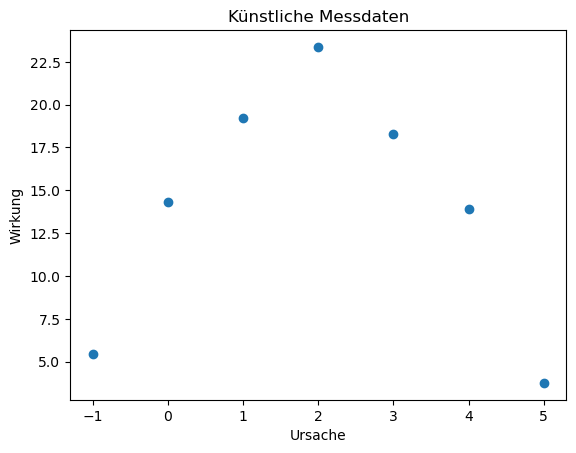

In [1]:
import matplotlib.pyplot as plt

x = [-1, 0, 1, 2, 3, 4, 5]
y = [5.4384, 14.3252, 19.2451, 23.3703, 18.2885, 13.8978, 3.7586]

plt.figure()
plt.scatter(x,y)
plt.xlabel('Ursache')
plt.ylabel('Wirkung')
plt.title('Künstliche Messdaten');

Sieht nicht nach einer linearen Funktion, also einer Geraden aus. Wir probieren
es mit einer quadratischen Funktion. Die Modellfunktion lautet 

$$f(x)=ax^2 + bx + c$$

mit den Parametern $a$, $b$  und $c$. Wir setzen in der `polyfit()`-Funktion den
Polynomgrad auf `grad=2`.

In [2]:
import numpy as np

p = np.polyfit(x, y, 2)
print(p)

[-1.90591667  7.37899524 14.53561429]


Bei der Zuordnung der Koeffizienten müssen wir sorgsam auf die Sortierung
achten. Unsere Modellfunktion beginnt beim quadratischen Anteil $ax^2$, dann
kommt der lineare Anteil $bx$ und zuletzt der konstante Part $c$.

In [3]:
a = p[0]
b = p[1]
c = p[2]

print(f'a = {a}')
print(f'b = {b}')
print(f'c = {c}')

a = -1.905916666666667
b = 7.378995238095238
c = 14.535614285714288


Wir erhalten also als Regressionsfunktion

$$r(x)=-1.9 x^2 + 7.4 x + 14.5.$$

Visualisieren wir die Modellfunktion zusammen mit den Messpunkten.

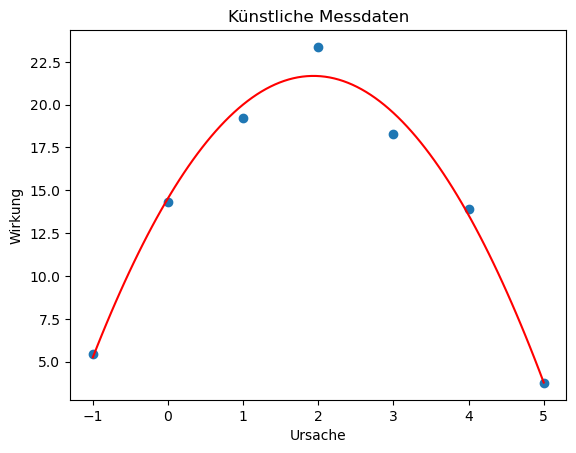

In [4]:
plt.figure();
plt.scatter(x,y);

x_plot = np.linspace(-1, 5, 100);
y_plot = a * x_plot**2 + b * x_plot + c
plt.plot(x_plot, y_plot, color='red')

plt.xlabel('Ursache')
plt.ylabel('Wirkung')
plt.title('Künstliche Messdaten');

Alternativ kann die Funktion `polyval` dazu genutzt werden, um die Parabel aufzustellen.

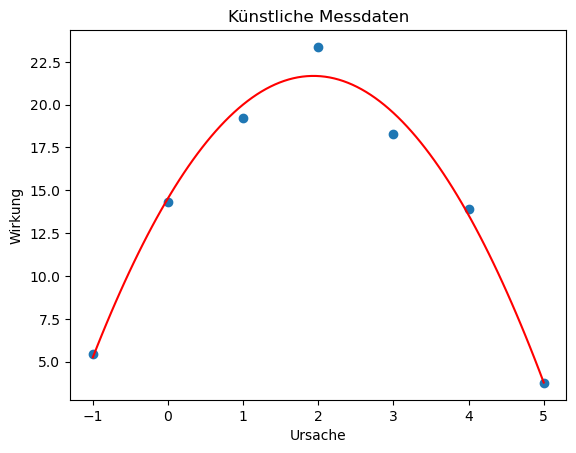

In [5]:
plt.figure();
plt.scatter(x,y);

x_plot = np.linspace(-1, 5, 100);
y_plot = np.polyval(p, x_plot)
plt.plot(x_plot, y_plot, color='red')

plt.xlabel('Ursache')
plt.ylabel('Wirkung')
plt.title('Künstliche Messdaten');

## Zuviel des Guten, höhere Polynomgrade sind nicht besser

Regressionspolynom scheinen zunächst besser zu sein als Regressionsgeraden.
Durch die zusätzlichen Terme können auch nichtlineare Beziehungen und komplexere
Muster in den Daten erklärt werden. Allerdings birgt die Verwendung von höhere
Polynomgraden auch das Risiko des Overfittings. Der Begriff **Overfitting**
bedeutet, dass das Regressionspolynom zu genau an die Daten angepasst wurde und
neue Daten schlechter prognostiziert. Das Gegenteil davon ist **Underfitting**.
Das Regressionspolynom hat einen zu kleinen Polynomgrad und kann daher die Daten
kaum bis gar nicht erklären. Die Wahl des Polynomgrades ist daher sehr wichtig.

Wir betrachten dazu das Beispiel von oben und verändern den Polynomgrad.

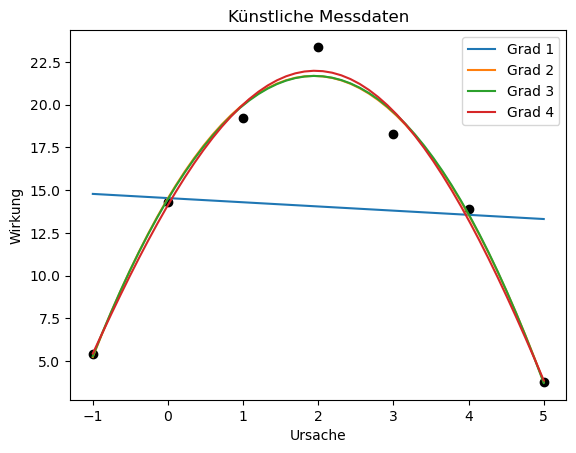

In [6]:
# künstliche Messdaten
x = [-1, 0, 1, 2, 3, 4, 5]
y = [5.4384, 14.3252, 19.2451, 23.3703, 18.2885, 13.8978, 3.7586]

plt.figure()
plt.scatter(x,y, color='black')
plt.xlabel('Ursache')
plt.ylabel('Wirkung')
plt.title('Künstliche Messdaten')

x_plot = np.linspace(-1,5)

for grad in [1, 2, 3, 4]:
  # berechne Regressionspolynom
  p = np.polyfit(x, y, grad)
  y_plot = np.polyval(p, x_plot)
  # visualisiere zusätzlich das Regressionspolynon
  plt.plot(x_plot, y_plot, label=f'Grad {grad}')
plt.legend();

Eine Regressionsgerade kann die Messdaten nicht gut erklären, aber die
Regressionspolynome Grad 2 bis 4 passen sehr gut zu den künstlichen Messdaten
des Beispiels. Probieren wir noch höhere Polynomgrade aus.

/var/folders/hd/xdjzhymn4x393gh7v6ws4v880000gn/T/ipykernel_13993/1428329300.py:15: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, grad)
/var/folders/hd/xdjzhymn4x393gh7v6ws4v880000gn/T/ipykernel_13993/1428329300.py:15: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, grad)


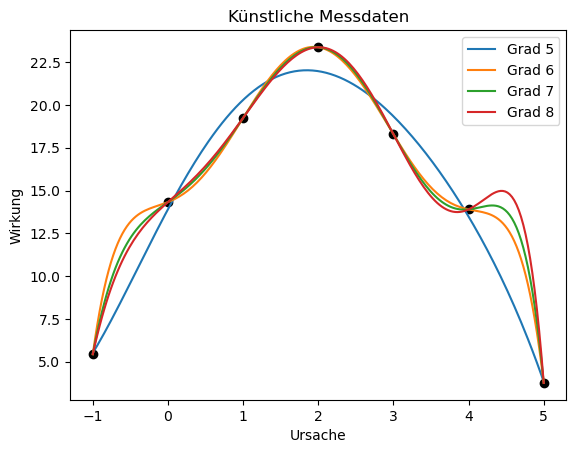

In [7]:
# künstliche Messdaten
x = [-1, 0, 1, 2, 3, 4, 5]
y = [5.4384, 14.3252, 19.2451, 23.3703, 18.2885, 13.8978, 3.7586]

plt.figure()
plt.scatter(x,y, color='black')
plt.xlabel('Ursache')
plt.ylabel('Wirkung')
plt.title('Künstliche Messdaten')

x_plot = np.linspace(-1,5, 200)

for grad in [5, 6, 7, 8]:
  # berechne Regressionspolynom
  p = np.polyfit(x, y, grad)
  y_plot = np.polyval(p, x_plot)
  # visualisiere zusätzlich das Regressionspolynon
  plt.plot(x_plot, y_plot, label=f'Grad {grad}')
plt.legend();

Grad 5 ist schon gut, aber die Regressionspolynome Grad 6 bis 8 scheinen perfekt
zu sein. Allerdings gibt es auch eine Warnung, denn wenn mehr
Polynomkoeffizienten da sind als Messpunkte, ist die Bestimmung der
Polynomkoeffizienten nicht mehr eindeutig. Dennoch, jeder Messpunkt wird exakt
von dem Regressionspolynom getroffen. Demnach müssten alle Residuen 0 sein und
damit für das Bestimmtheitsmaß $R^2 = 1$ gelten. Am besten lassen wir eine
Tabelle für den Polynomgrad und das jeweilige Residuum ausgeben. Dazu schreiben
wir aber erst eine Funktion, die das Bestimmtheitsmaß ausrechnet.

In [8]:
def berechne_r2(y, y_modell):
    N = len(y)
    y_mittelwert = 0
    for messwert in y:
        y_mittelwert = y_mittelwert + messwert
    y_mittelwert = y_mittelwert / N

    zaehler = 0
    nenner = 0
    for i in range(N):
        zaehler = zaehler + (y[i] - y_modell[i])**2
        nenner  = nenner  + (y[i] - y_mittelwert)**2

    r2 = 1 - zaehler / nenner
    return r2

Das war eine sehr händische Implementierung des R2-Bestimmtheitsmaßes. Mit
NumPy-Arrays hätte das eleganter funktioniert. Das Modul Sciki-Learn stellt auch
schon eine Implementierung zur Verfügung. Jetzt verwenden wir die Funktion, um
für die Polynomgrade von 1 bis 8 das Bestimmtheitsmaß zu bestimmen.

In [9]:
for grad in range(1,9):
    p = np.polyfit(x, y, grad)
    y_modell = np.polyval(p, x)
    r2 = berechne_r2(y, y_modell)
    print(f'Polynomgrad {grad}: R2 = {r2:.4f}')

Polynomgrad 1: R2 = 0.0054
Polynomgrad 2: R2 = 0.9834
Polynomgrad 3: R2 = 0.9834
Polynomgrad 4: R2 = 0.9847
Polynomgrad 5: R2 = 0.9855
Polynomgrad 6: R2 = 1.0000
Polynomgrad 7: R2 = 1.0000
Polynomgrad 8: R2 = 1.0000


/var/folders/hd/xdjzhymn4x393gh7v6ws4v880000gn/T/ipykernel_13993/2075500443.py:2: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, grad)
/var/folders/hd/xdjzhymn4x393gh7v6ws4v880000gn/T/ipykernel_13993/2075500443.py:2: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, grad)


 
Wenn wir den Polynomgrad noch höher treiben, passiert etwas Seltsames.

/var/folders/hd/xdjzhymn4x393gh7v6ws4v880000gn/T/ipykernel_13993/2455438802.py:15: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, grad)
/var/folders/hd/xdjzhymn4x393gh7v6ws4v880000gn/T/ipykernel_13993/2455438802.py:15: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, grad)
/var/folders/hd/xdjzhymn4x393gh7v6ws4v880000gn/T/ipykernel_13993/2455438802.py:15: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, grad)
/var/folders/hd/xdjzhymn4x393gh7v6ws4v880000gn/T/ipykernel_13993/2455438802.py:15: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, grad)


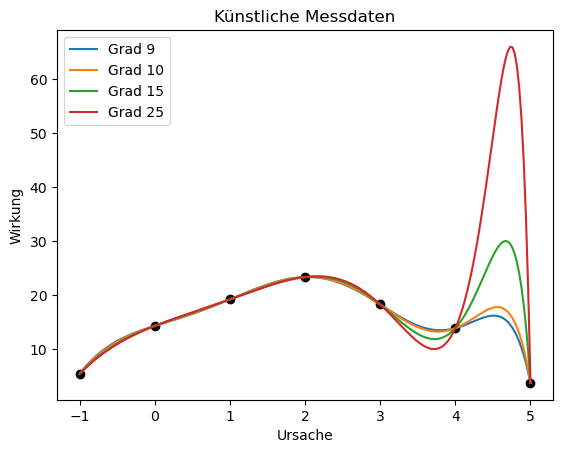

In [10]:
# künstliche Messdaten
x = [-1, 0, 1, 2, 3, 4, 5]
y = [5.4384, 14.3252, 19.2451, 23.3703, 18.2885, 13.8978, 3.7586]

plt.figure()
plt.scatter(x,y, color='black')
plt.xlabel('Ursache')
plt.ylabel('Wirkung')
plt.title('Künstliche Messdaten')

x_plot = np.linspace(-1,5, 200)

for grad in [9, 10, 15, 25]:
  # berechne Regressionspolynom
  p = np.polyfit(x, y, grad)
  y_plot = np.polyval(p, x_plot)
  # visualisiere zusätzlich das Regressionspolynon
  plt.plot(x_plot, y_plot, label=f'Grad {grad}')
plt.legend();

Die Polynome beginnen zwischen $x=4$ und $x=5$ immer höher zu schwingen. Es ist
unplausibel, dass diese Polynome die Messdaten gut erklären. Daher empfiehlt es
sich, möglichst den kleinsten Polynomgrad zu nehmen, der sehr gut, aber nicht
perfekt ist. Bei der Tabelle der R2-Werte haben wir gesehen, dass der R2-Wert
von 0.0054 (Grad 1) auf 0.9834 (Grad 2) springt. Danach sind aber keine
wesentlichen Verbesserungen mehr erkennbar. Daher wählen wir Grad 2 als
Regressionspolynom.